In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/Users/prateek/Documents/FDS Project/dataset/chicago.csv"  
df = pd.read_csv(file_path)

print("Raw dataset shape:", df.shape)
df.head()


Raw dataset shape: (1366809, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13992566,JJ445494,10/07/2025 12:00:00 AM,055XX S CORNELL AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,5.0,41.0,07,1188203.0,1868594.0,2025,10/14/2025 03:58:46 PM,41.794501,-87.585394,"(41.794501214, -87.585393597)"
1,13990318,JJ442716,10/07/2025 12:00:00 AM,068XX S DORCHESTER AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,5.0,43.0,07,1186716.0,1860002.0,2025,10/14/2025 03:58:46 PM,41.770959,-87.591118,"(41.770959436, -87.591118262)"
2,13990772,JJ443163,10/07/2025 12:00:00 AM,073XX S YALE AVE,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,6.0,69.0,06,1175894.0,1856284.0,2025,10/14/2025 03:58:46 PM,41.761006,-87.630899,"(41.761006252, -87.630898707)"
3,13990291,JJ442642,10/07/2025 12:00:00 AM,078XX S LUELLA AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,7.0,43.0,05,1192564.0,1853308.0,2025,10/14/2025 03:58:46 PM,41.752450,-87.569900,"(41.752450088, -87.569899803)"
4,13992893,JJ445885,10/07/2025 12:00:00 AM,107XX S BENSLEY AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,10.0,51.0,14,1194565.0,1834279.0,2025,10/14/2025 03:58:46 PM,41.700184,-87.563191,"(41.700183824, -87.563191012)"


In [7]:
df.info()

# Check null values
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366809 entries, 0 to 1366808
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1366809 non-null  int64  
 1   Case Number           1366809 non-null  object 
 2   Date                  1366809 non-null  object 
 3   Block                 1366809 non-null  object 
 4   IUCR                  1366809 non-null  object 
 5   Primary Type          1366809 non-null  object 
 6   Description           1366809 non-null  object 
 7   Location Description  1359445 non-null  object 
 8   Arrest                1366809 non-null  bool   
 9   Domestic              1366809 non-null  bool   
 10  Beat                  1366809 non-null  int64  
 11  District              1366809 non-null  int64  
 12  Ward                  1366775 non-null  float64
 13  Community Area        1366712 non-null  float64
 14  FBI Code              1366809 non-

Location                19572
Longitude               19572
Latitude                19572
Y Coordinate            19572
X Coordinate            19572
Location Description     7364
Community Area             97
Ward                       34
Updated On                  0
Year                        0
dtype: int64

In [8]:
useful_cols = [
    'ID', 'Date', 'Primary Type', 'Description', 'Location Description',
    'Arrest', 'Domestic', 'District', 'Ward', 'Community Area',
    'Latitude', 'Longitude'
]
df = df[useful_cols]

# Drop rows with critical missing values
df = df.dropna(subset=['Primary Type', 'Latitude', 'Longitude', 'Date'])
print("After dropping missing values:", df.shape)


After dropping missing values: (1347237, 12)


In [9]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Extract useful date/time parts
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()

# Confirm changes
df[['Date', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].head()


/var/folders/40/xpskrwgs1l1734zl9j0227hw0000gn/T/ipykernel_46666/514097587.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Date,Year,Month,Day,Hour,DayOfWeek
0,2025-10-07,2025,10,7,0,Tuesday
1,2025-10-07,2025,10,7,0,Tuesday
2,2025-10-07,2025,10,7,0,Tuesday
3,2025-10-07,2025,10,7,0,Tuesday
4,2025-10-07,2025,10,7,0,Tuesday


In [10]:
df.rename(columns={
    'Primary Type': 'Crime_Type',
    'Location Description': 'Location_Type'
}, inplace=True)


In [11]:
# Keep coordinates within the Chicago city bounding box
df = df[(df['Latitude'] > 41.6) & (df['Latitude'] < 42.1)]
df = df[(df['Longitude'] > -87.95) & (df['Longitude'] < -87.5)]

print("After coordinate filtering:", df.shape)


After coordinate filtering: (1347235, 17)


In [12]:
df.to_csv('/Users/prateek/Documents/FDS Project/dataset/chicago_crime_cleaned.csv', index=False)
print("Cleaned dataset saved as 'chicago_crime_cleaned.csv'")


✅ Cleaned dataset saved as 'chicago_crime_cleaned.csv'


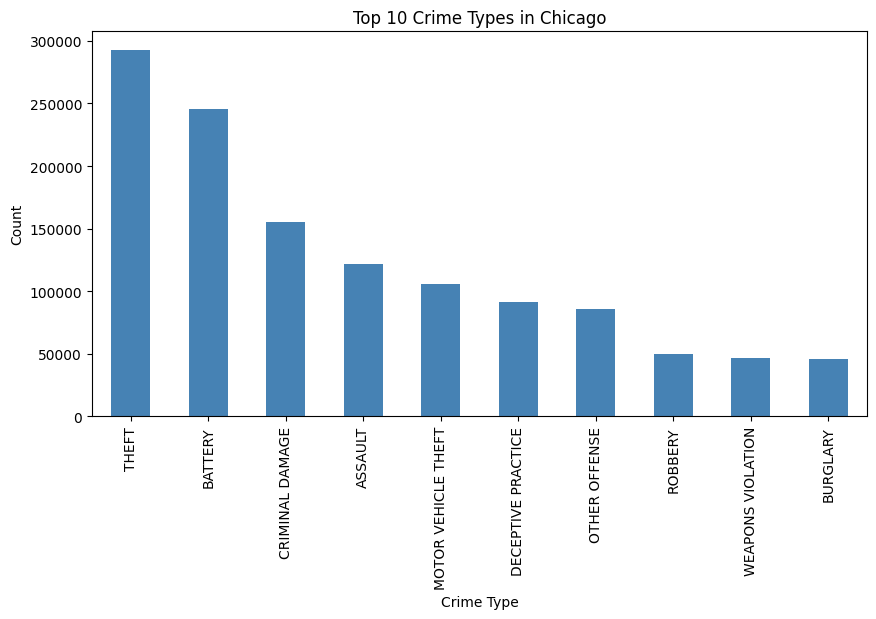

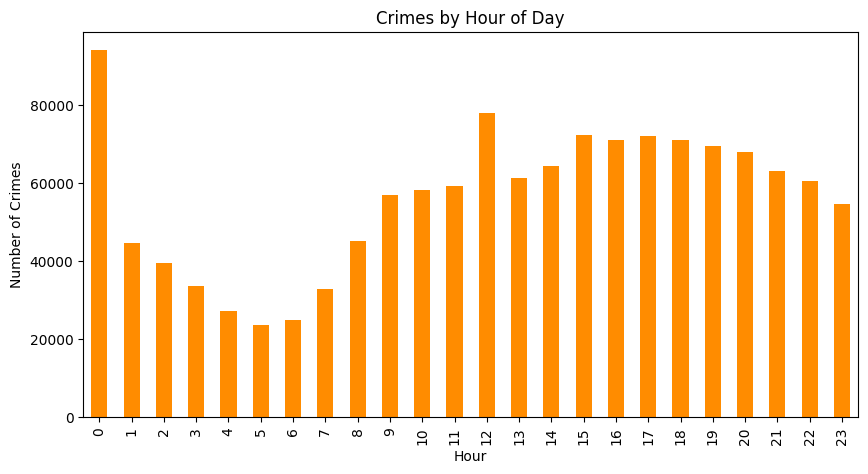

In [13]:
# Crimes by Type (Top 10)
plt.figure(figsize=(10,5))
df['Crime_Type'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Crime Types in Chicago')
plt.ylabel('Count')
plt.xlabel('Crime Type')
plt.show()

# Crimes by Hour of Day
plt.figure(figsize=(10,5))
df['Hour'].value_counts().sort_index().plot(kind='bar', color='darkorange')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()


In [14]:
# Print summary of numeric columns
df.describe(include='all')

# Crime distribution by weekday
print("\nCrimes by Day of Week:")
print(df['DayOfWeek'].value_counts())

# Arrest vs. Non-Arrest
arrest_ratio = df['Arrest'].value_counts(normalize=True)
print("\nArrest Ratio:\n", arrest_ratio)



Crimes by Day of Week:
DayOfWeek
Friday       197880
Saturday     196494
Sunday       193757
Monday       192951
Wednesday    190303
Thursday     188278
Tuesday      187572
Name: count, dtype: int64

Arrest Ratio:
 Arrest
False    0.864191
True     0.135809
Name: proportion, dtype: float64
